In [1]:
import glob, os
import pandas as pd
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

DATA_ROOT_PATH = "../szczury/better_data/"

## Load datasets ##

In [54]:
from types import SimpleNamespace 

def load_dataset(path):
    dataset = np.load(path, allow_pickle=True)

    data = SimpleNamespace(X=dataset['X'], y=dataset['y'], meta=dataset['meta'])
    data.y_binary = np.where(data.y == None, 0, 1)  # 0 -> negative, 1 -> positive
    print(data.meta)
    
    return data

train_data = load_dataset('ch1-2018-11-20_10-31-42_0000014.wav.npz')
test_data = load_dataset('ch1-2018-11-20_10-26-36_0000010.wav.npz')


{'audio_name': 'ch1-2018-11-20_10-31-42_0000014.wav', 'audio_length': 30001224, 'n_fft': 512, 'hop_length': 128, 'sampling_rate': 250000}
{'audio_name': 'ch1-2018-11-20_10-26-36_0000010.wav', 'audio_length': 30001224, 'n_fft': 512, 'hop_length': 128, 'sampling_rate': 250000}


In [15]:
# """grip all data"""
# assert os.path.exists(DATA_ROOT_PATH)

# wavs = sorted(glob.glob(f"{DATA_ROOT_PATH}/*.wav"))

# X, y = extract_audio_frames(wavs[0][23:], labels)
# for i in range(1, len(wavs)):
#     wav_X, wav_y = extract_audio_frames(wavs[i][23:], labels)
#     X = np.concatenate((X, wav_X), axis=0)
#     y = np.concatenate((y, wav_y), axis=0)

# TODO: extend for more input files


In [4]:
"""print number of element per type"""
from collections import Counter

type_numbers = Counter(data.y)

# for usv_type in USV_TYPES:
#     size = np.argwhere(y == usv_type).reshape(-1).size
#     print(usv_type, size)
#     type_nubers += [size]

# mean_sample = np.int64(np.mean(type_nubers));
# print("MEAN", mean_sample)

for key, count in type_numbers.most_common():
    print(key, count)

mean = sum(type_numbers.values()) / len(type_numbers)
print(f"MEAN: {mean:.2f}")

None 135417
ST 24023
FM 23142
TR 20953
CMP 13948
FL 9372
22kHz 7104
RP 278
SH 148
MEAN: 26042.78


In [18]:


# def get_sample(usv_type, sample_size, X, y):
#     idx = np.argwhere(y == usv_type).reshape(-1)
#     randint_array = np.random.randint(idx.size, size=sample_size)
#     sample_idx = idx[randint_array]
#     return (X[sample_idx], y[sample_idx])

In [19]:
# """Create Sampled dataset"""

# mean_sample = 200
# new_X, new_y = get_sample(None, mean_sample, X, y)
# for usv_type in USV_TYPES:
#     type_sample_X, type_sample_y = get_sample(usv_type, mean_sample, X, y)
#     new_X = np.concatenate((new_X, type_sample_X), axis=0)
#     new_y = np.concatenate((new_y, type_sample_y), axis=0)

In [20]:
# X, y = new_X, new_y

# print(X.shape, y.shape)

(2000, 513) (2000,)


In [21]:
# k = 3
# train_size = np.int64(((k - 1) * y.size / k))
# print(f"train_size: {train_size}")

train_size: 1333


In [22]:
# """Map to integer labels"""
# dict_types = {None: 0,
#              'SH': 1,
#              'FM': 2,
#              'RP': 3,
#              'FL': 4,
#              'ST': 5,
#              'CMP': 6,
#              'IU': 7,
#              'TR': 8,
#              'RM': 9}

# y = list(map(lambda x: dict_types[x], y))
# y[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [5]:
from sklearn.svm import SVR, SVC
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn import  metrics

In [28]:
"""try to classify"""

svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5,
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3],
                               "gamma": np.logspace(-2, 2, 5)})

svr.fit(X[:train_size], y[:train_size])

yHood = svr.predict(X[train_size:])

acc = 100 * len([a for (a, b) in zip(y[train_size:], yHood) if a == b]) / len(yHood)
print(f"SVR acc:{acc}%")
    

D:\Miniconda3\envs\ml19\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


SVR acc:0.0%


In [29]:
yHood

array([3.33594711, 3.33594695, 3.33594711, 3.42596518, 3.31388646,
       3.33594711, 3.33814974, 3.33594711, 0.93754694, 3.33594711,
       3.33594711, 3.33594711, 3.33521399, 3.33594711, 3.33594711,
       3.33187375, 1.21829185, 3.33595708, 3.98431375, 3.34114214,
       3.33594711, 2.11995883, 3.33594711, 3.3357724 , 2.77142817,
       3.31928382, 3.33594711, 3.33594711, 1.26833601, 3.09517334,
       3.33594711, 1.62417348, 3.3212035 , 3.33824822, 3.33594695,
       3.08805974, 3.32816887, 3.33598731, 3.33594711, 3.33594711,
       3.18414293, 3.33594711, 3.33594711, 2.0299524 , 3.33594711,
       3.33594713, 3.24784613, 3.12938936, 3.3428348 , 3.33594711,
       3.33594711, 0.75944643, 3.31771616, 3.33588507, 3.35097152,
       3.2474676 , 3.33594771, 3.33458352, 2.92087197, 3.33594711,
       1.13878343, 3.33594711, 3.30507852, 1.55792295, 3.33594711,
       3.33594711, 3.33594711, 3.31512298, 3.33949339, 3.33594711,
       3.33594711, 3.33594711, 3.33594578, 3.33594711, 3.25495

In [ ]:
kr = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1), cv=5,
                  param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3],
                              "gamma": np.logspace(-2, 2, 5)})
kr.fit(X[:train_size], y[:train_size])

yHood = kr.predict(X[train_size:])

acc = 100 * len([a for a, b in zip(y[train_size:], yHood) if a == b]) / len(yHood)
print(f"KernelRidge acc:{acc}%")

# SVM classification #

### Correlation matrix ###

(257, 257)


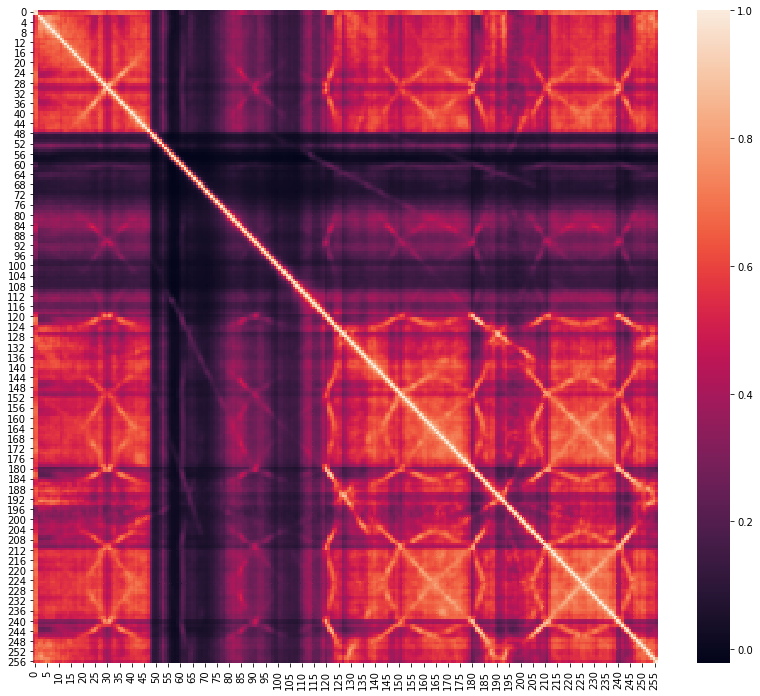

In [20]:
import seaborn as sbs
corr = np.corrcoef(data.X.T)
print(corr.shape)

plt.figure(figsize=(14,12))
sbs.heatmap(corr)
# print(cov.diag())
# i = np.arange(257)


### Normalization for SVM ###

In [55]:
mu = np.mean(train_data.X)
sigma2 = np.std(train_data.X)

print(mu, sigma2)

train_data.X = (train_data.X-mu)/sigma2
test_data.X = (test_data.X-mu)/sigma2

print(np.mean(train_data.X), np.std(train_data.X))
print(np.mean(test_data.X), np.std(test_data.X))

0.13481405 1.5123105
-2.8433854e-08 0.99999464
-0.04792536 0.11938979


In [62]:
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score

model = SVC()

# Train
idx = np.random.randint(0, train_data.y.size, size=10000)
model.fit(train_data.X[idx], train_data.y_binary[idx])
print('Done')

# Evaluation
idx = np.random.randint(0, test_data.y.size, size=50000)
y_pred = model.predict(test_data.X[idx])
y_true = test_data.y_binary[idx]

print(confusion_matrix(y_true, y_pred))

print('accuracy:', accuracy_score(y_true, y_pred))
precision, recall, fscore, support = precision_recall_fscore_support(y_true, y_pred, average='macro')

print('precision:', precision)
print('recall:', recall)
print('fscore:', fscore)
c = Counter(y_true)
print('support:', c)
print('random accuracy:', sum(i*i for i in c.values()) / sum(c.values())**2)


/home/solmyr/Codes/studia/2019-2020-winter/happy-szczurki/.env/lib/python3.8/site-packages/sklearn/svm/base.py:189: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  warnings.warn("The default value of gamma will change "


Done
[[44453   204]
 [ 3728  1615]]
accuracy: 0.92136
precision: 0.9052377842353415
recall: 0.6488482462605744
fscore: 0.7043189982551451
support: Counter({0: 44657, 1: 5343})
random accuracy: 0.8091181192


## Jak oceniać modele? jaka miara? ##
## Jak normalizować dane? potrzebne dla SVMa ##

219942 y_true= 0
219922 y_true= 0
162352 y_true= 0
82446 y_true= 0
29560 y_true= 0


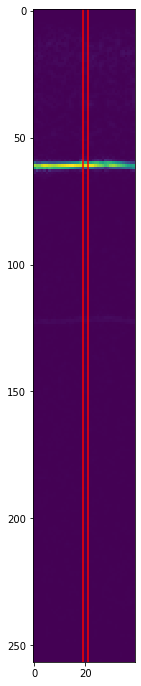

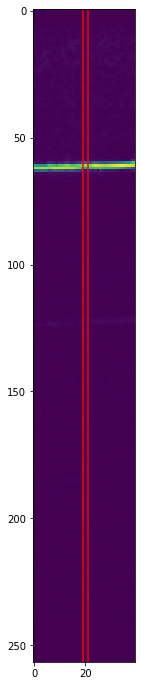

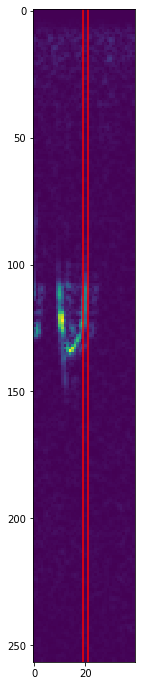

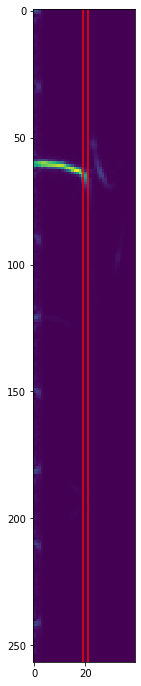

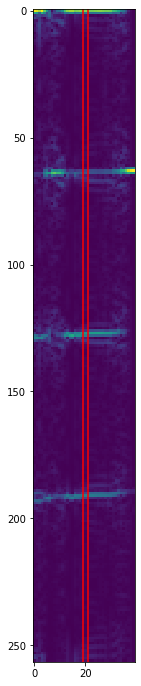

In [52]:
ile = 0
for i in range(len(y_pred)):
    if y_pred[i] != y_true[i] and y_true[i] == 0:
        print(idx[i], 'y_true=', y_true[i])
        plt.figure(figsize=(12,12))
        plt.imshow(data.X[idx[i]-20:idx[i]+20].T)
        plt.axvline(19,color='red')
        plt.axvline(21,color='red')
        ile += 1
    if ile == 5:
        break